In [2]:
%load_ext tikzmagic

# 일반 선형 확률 과정 모형

정상 확률 과정(stationary process)에서 가장 일반적으로 사용되는 모형은 **일반 선형 확률 과정 모형(general linear process model)**이다. 일반 선형 확률 과정 모형은 시계열이 **가우시안 백색 잡음의 현재 값과 과거 값들의 선형 조합으로 이루어져 있다**고 가정한다. 이 수식에서 $e_t$는 가우시안 백색 잡음이고 $\psi$는 백색 잡음에 곱해지는 가중 계수(weight coefficient)이다.


$$ Y_t = e_t + \psi_1 e_{t-1}  + \psi_2 e_{t-2}  + \psi_3 e_{t-3}  + \cdots $$

다만 선형 확률 과정 모형이 성립하려면 계수들이 다음 조건을 만족해야 한다. 이 조건은 전체 항들의 합이 수렴하도록 즉, 전체 값의 크기가 과도하게 커지지 않도록 하는 역할을 한다.

$$ \sum_{i=1}^{\infty} \psi_i^2 < \infty $$

이 모형을 블럭 다이어그램으로 나타내면 다음과 같다. 이 다이어그램에서 $L$는 신호가 저장되었다가 다음 시간에 나오는 일종의 저장 장치이다. 지연(lag) 요소라고 불린다. 책에 따라서는 D(Delay), B(Backshift)라고 표기하는 경우도 있다.

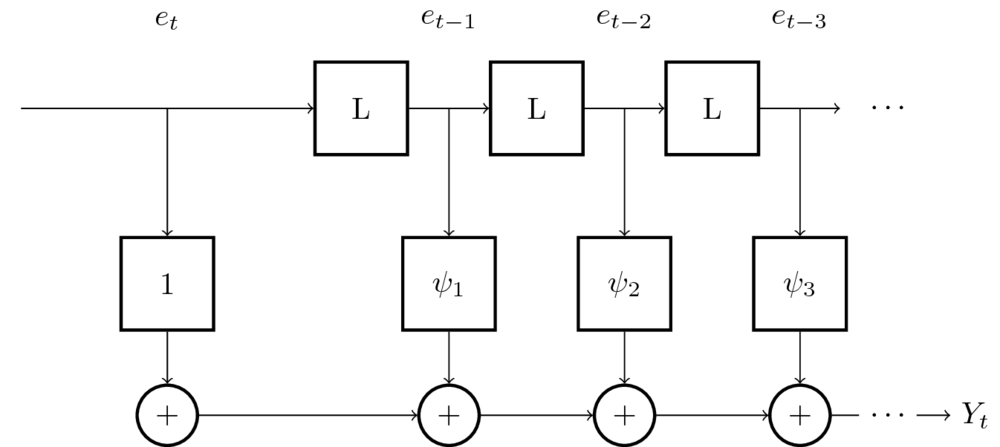

In [3]:
%%tikz --scale 2 --size 1000,1000 -f png

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (-2,0) (input) {};

\node [block] (d1) {L};
\draw[->] (input) -- (d1);
\path (input) -- coordinate(b1) (d1);
\node [above of=b1]  {$e_{t}$};
\node [block, below of=b1] (c1) {1};
\draw[->] (b1) -- (c1);
\node [sum, below of=c1] (s1) {+};
\draw[->] (c1) -- (s1);

\node [block, right of=d1] (d2) {L};
\draw[->] (d1) -- (d2);
\path (d1) -- coordinate(b2) (d2);
\node [above of=b2]  {$e_{t-1}$};
\node [block, below of=b2] (c2) {$\psi_1$};
\draw[->] (b2) -- (c2);
\node [sum, below of=c2] (s2) {+};
\draw[->] (c2) -- (s2);
\draw[->] (s1) -- (s2);

\node [block, right of=d2] (d3) {L};
\draw[->] (d2) -- (d3);
\path (d2) -- coordinate(b3) (d3);
\node [above of=b3]  {$e_{t-2}$};
\node [block, below of=b3] (c3) {$\psi_2$};
\draw[->] (b3) -- (c3);
\node [sum, below of=c3] (s3) {+};
\draw[->] (c3) -- (s3);
\draw[->] (s2) -- (s3);

\node [dots, right of=d3] (d4) {$\cdots$};
\draw[->] (d3) -- (d4);
\path (d3) -- coordinate(b4) (d4);
\node [above of=b4]  {$e_{t-3}$};
\node [block, below of=b4] (c4) {$\psi_3$};
\draw[->] (b4) -- (c4);
\node [sum, below of=c4] (s4) {+};
\draw[->] (c4) -- (s4);
\draw[->] (s3) -- (s4);

\node [right of=s4] (dots) {$\cdots$};
\node [right of=dots] (output) {$Y_t$};

\draw[-] (s4) -- (dots);
\draw[->] (dots) -- (output);

Lag 연산자는 수식에서 다음과 같은 의미를 가진다.

$$ Y_{t-1} = LY_{t} $$
$$ Y_{t-2} = L^2Y_{t} $$
$$ Y_{t-k} = L^kY_{t} $$

일반 선형 확률 과정 모형은 계수의 특성에 따라 다음과 같은 하위 모형으로 분류할 수 있다


* MA (Moving Average) 모형
* AR (Auto-Regressive) 모형
* ARMA (Auto-Regressive Moving Average) 모형

### MA 모형

MA 모형은 일반 선형 확률 모형의 차수가 유한(finite)한 경우를 말한다. $q$차수의 MA 모형은 MA(q)로 표기하며 다음 수식을 만족한다.

$$ Y_t = e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots + \theta_q e_{t-q} $$

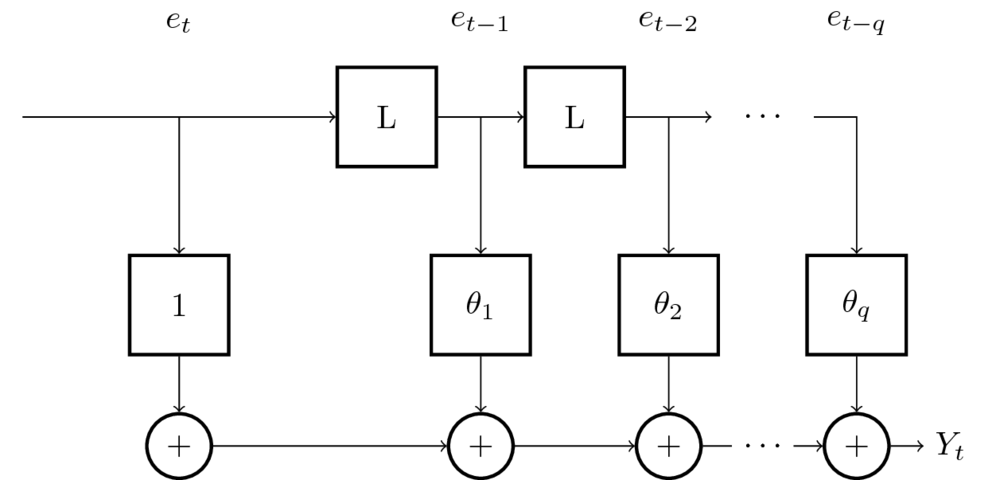

In [4]:
%%tikz --scale 2 --size 1000,1000 -f png  

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (-2,0) (input) {};

\node [block] (d1) {L};
\draw[->] (input) -- (d1);
\path (input) -- coordinate(b1) (d1);
\node [above of=b1]  {$e_{t}$};
\node [block, below of=b1] (c1) {1};
\draw[->] (b1) -- (c1);
\node [sum, below of=c1] (s1) {+};
\draw[->] (c1) -- (s1);

\node [block, right of=d1] (d2) {L};
\draw[->] (d1) -- (d2);
\path (d1) -- coordinate(b2) (d2);
\node [above of=b2]  {$e_{t-1}$};
\node [block, below of=b2] (c2) {$\theta_1$};
\draw[->] (b2) -- (c2);
\node [sum, below of=c2] (s2) {+};
\draw[->] (c2) -- (s2);
\draw[->] (s1) -- (s2);

\node [dots, right of=d2] (d3) {$\cdots$};
\draw[->] (d2) -- (d3);
\path (d2) -- coordinate(b3) (d3);
\node [above of=b3]  {$e_{t-2}$};
\node [block, below of=b3] (c3) {$\theta_2$};
\draw[->] (b3) -- (c3);
\node [sum, below of=c3] (s3) {+};
\draw[->] (c3) -- (s3);
\draw[->] (s2) -- (s3);

\node [dots, right of=d3] (d4) {};
\path (d3) -- coordinate(b4) (d4);
\node [above of=b4]  {$e_{t-q}$};
\node [block, below of=b4] (c4) {$\theta_q$};
\draw[->] (d3) -| (c4);
\node [right of=s3] (dots) {$\cdots$};
\draw[-] (s3) -- (dots);
\node [sum, below of=c4] (s4) {+};
\draw[->] (c4) -- (s4);

\node [right of=s4] (output) {$Y_t$};
\draw[<-] (s4) -- (dots);
\draw[->] (s4) -- (output);


MA 수식을 Lag 연산자(operator)를 사용하면 다음처럼 쓸 수 있다.

$$ Y_t = e_t + \theta_1 L e_{t} + \theta_2 L^2 e_{t} + \cdots + \theta_q L^q e_{t} $$
$$ Y_t = (1 + \theta_1 L + \theta_2 L^2 + \cdots + \theta_q L^q) e_{t} $$

이를 줄여서 다음과 같이 쓰기도 한다.

$$ Y_t = \theta(L) e_t $$

이 식에서 $\theta(L)$은 다음 다항식을 뜻한다.

$$ \theta(L) = 1 + \theta_1 L + \theta_2 L^2 + \cdots \theta_q L^q $$

### AR 모형

AR 모형은 자기 자신의 과거값에 의존적인 모형을 말한다.  $p$차수의 AR 모형은 AR(p)로 표기하며 다음 수식을 만족한다.

$$ Y_t = -\phi_1 Y_{t-1} - \phi_2 Y_{t-2} - \cdots - \phi_p Y_{t-p}  + e_t $$

AR 수식을 Lag 연산자(operator)를 사용하면 다음처럼 쓸 수 있다.

$$ (1 + \phi_1 L + \phi_2 L^2 + \cdots + \phi_p L^p) Y_t = e_{t} $$

이를 줄여서 다음과 같이 쓰기도 한다.

$$ \phi(L) Y_t = e_t $$

이 식에서 $\theta(L)$은 다음 다항식을 뜻한다.

$$ \phi(L) = 1 + \phi_1 L + \phi_2 L^2 + \cdots \phi_p L^p $$

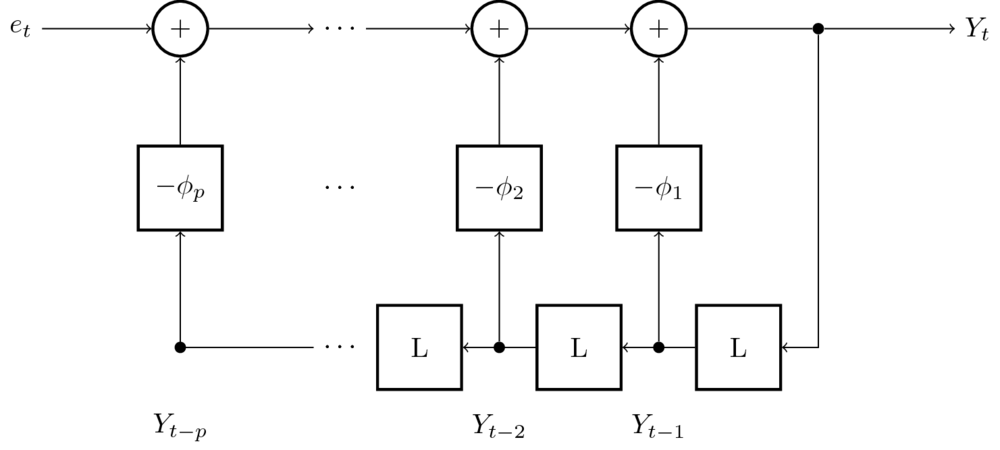

In [5]:
%%tikz --scale 1 --size 1000,1000 -f png

\tikzstyle{block} = [draw, shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{dots} = [shape=rectangle, minimum height=3em, minimum width=3em, node distance=2cm, line width=1pt]
\tikzstyle{sum} = [draw, shape=circle, node distance=1.5cm, line width=1pt, minimum width=1em]
\tikzstyle{branch}=[fill,shape=circle,minimum size=4pt,inner sep=0pt]

\node at (0,0) (e) {$e_t$};
\node [sum] at (2,0) (s1) {+};
\node       at (4,0) (s2) {$\cdots$};
\node [sum] at (6,0) (s3) {+};
\node [sum] at (8,0) (s4) {+};
\node [block] at (2,-2) (b1) {$-\phi_p$};
\node         at (4,-2) (b2) {$\cdots$};
\node [block] at (6,-2) (b3) {$-\phi_2$};
\node [block] at (8,-2) (b4) {$-\phi_1$};
\node [branch] at (2,-4) (bb1) {};
\node          at (4,-4) (bb2) {$\cdots$};
\node [branch] at (6,-4) (bb3) {};
\node [branch] at (8,-4) (bb4) {};
\node [branch] at (10,0) (by) {};
\node [block]  at (9,-4) (d4) {L};
\node [block]  at (7,-4) (d3) {L};
\node [block]  at (5,-4) (d2) {L};
\node [below of=bb4]  {$Y_{t-1}$};
\node [below of=bb3]  {$Y_{t-2}$};
\node [below of=bb1]  {$Y_{t-p}$};
\node at (10,-4) (bby) {};
\node at (12,0) (y) {$Y_t$};

\draw[->] (e) -- (s1);
\draw[->] (s1) -- (s2);
\draw[->] (s2) -- (s3);
\draw[->] (s3) -- (s4);
\draw[->] (b1) -- (s1);
\draw[->] (b3) -- (s3);
\draw[->] (b4) -- (s4);
\draw[-] (s4) -- (by);
\draw[->] (by) -- (y);
\draw[->] (by) |- (d4);
\draw[->] (d4) -- (d3);
\draw[->] (d3) -- (d2);
\draw[->] (bb2) -| (b1);
\draw[->] (bb4) -- (b4);
\draw[->] (bb3) -- (b3);

### ARMA 모형

ARMA 모형은 AR 모형과 MA 모형을 합친 모형이다.

$$ Y_t = -\phi_1 Y_{t-1} - \phi_2 Y_{t-2} - \cdots - \phi_p Y_{t-p} + e_t + \theta_1 e_{t-1} + \theta_2 e_{t-2} + \cdots + \theta_q e_{t-q} $$

줄여서 다음과 같이 쓰기도 한다.

$$ \phi(L) Y_t = \theta(L) e_t $$